### Importing main.ipynb 
In order to use prepared datasets of main.ipynb for model fitting, we need to import that..

In [15]:
# pip install import-ipynb
import import_ipynb
import main ### Importing main.ipynb

### Importing necessary libraries.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Function for Model fitting, Model evaluation and Visualization.

In [26]:
def XGB_model(x,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)
    print("Successfully splitted!!!")
    
    print("Model Fitting.....")
    xgb = XGBClassifier()
    xgb.fit(x_train, y_train)
    print("Successfully model fitted!!!\n")

    print("------------Training Prediction--------------")
    y_preds = xgb.predict(x_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)
    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",color="orange",fontsize=16);
    ax.set(xlabel="Predicted Label",ylabel="Actual Label");
    
    train_acc = accuracy_score(y_train, y_preds)
    print(f"Accuracy Score (Train): {train_acc * 100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds = xgb.predict(x_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)
    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",color="orange",fontsize=16);
    ax.set(xlabel="Predicted Label",ylabel="Actual Label");
    
    test_acc = accuracy_score(y_test, y_preds)
    print(f"Accuracy Score (Test): {test_acc * 100:2f}%\n")
    
    return test_acc

### XGBClassifier on Normal Datasets.

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!

------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



Accuracy Score (Train): 100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.80      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy Score (Test): 99.954356%



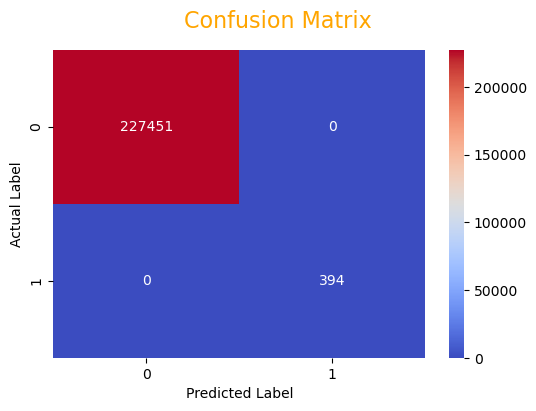

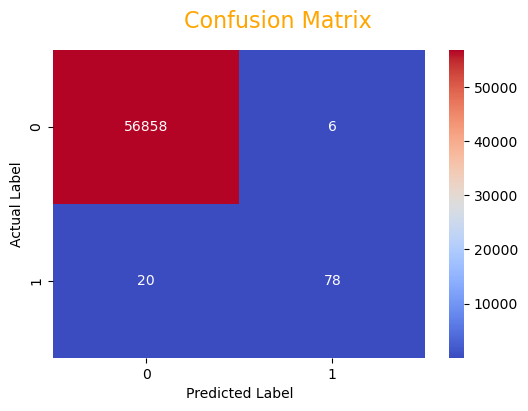

In [29]:
acc_normal_test=XGB_model(main.x, main.y)

### XGBClassifier on Undersampled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!

------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787



Accuracy Score (Train): 100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        99
           1       0.95      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



Accuracy Score (Test): 91.878173%



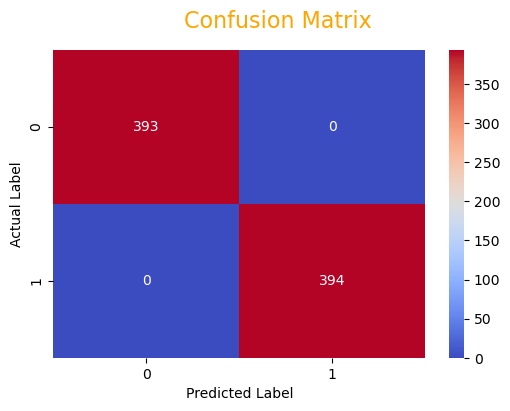

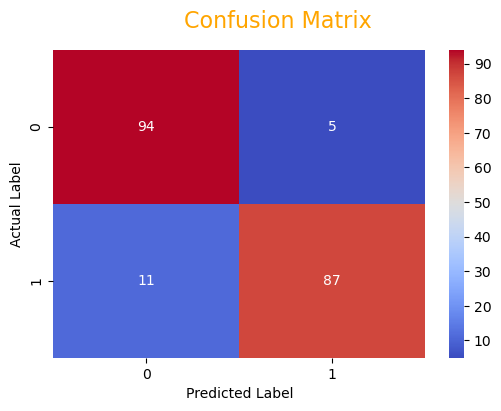

In [31]:
acc_under_test=XGB_model(main.x_undersampled, main.y_undersampled)

### XGBClassifier on Oversampled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!

------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227335
           1       1.00      1.00      1.00    227569

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



Accuracy Score (Train): 100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56980
           1       1.00      1.00      1.00     56746

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



Accuracy Score (Test): 99.993845%



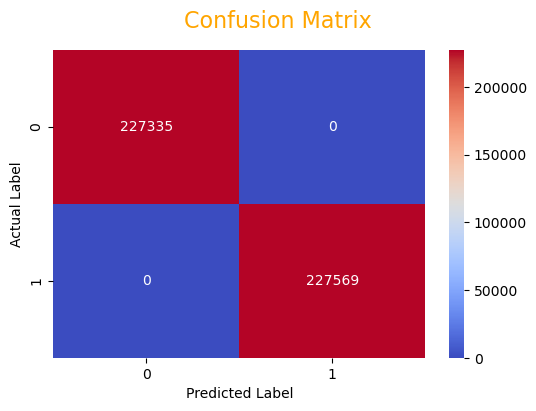

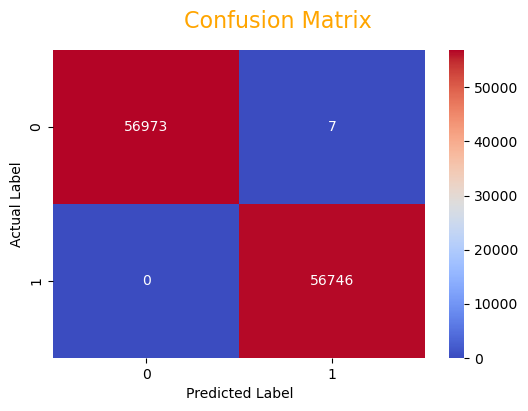

In [33]:
acc_over_test=XGB_model(main.x_oversampled, main.y_oversampled)

### XGBClassifier on SMOTE Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!

------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227565
           1       1.00      1.00      1.00    227339

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



Accuracy Score (Train): 99.999780%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



Accuracy Score (Test): 99.984172%



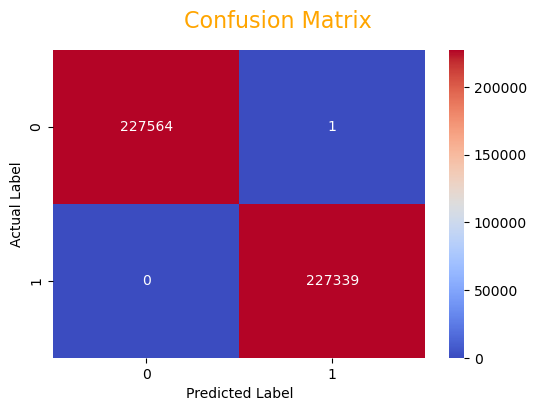

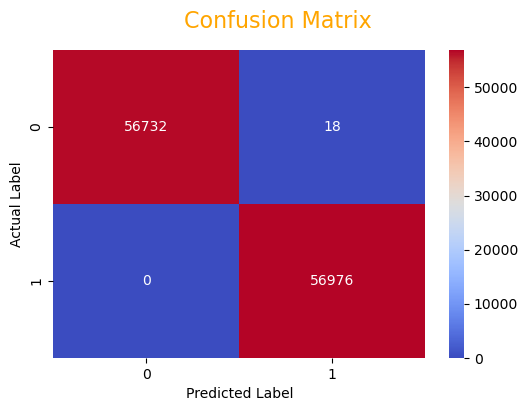

In [35]:
acc_smote_test=XGB_model(main.x_smote, main.y_smote)

### Comparison of Test Accuracy Across Sampling Techniques

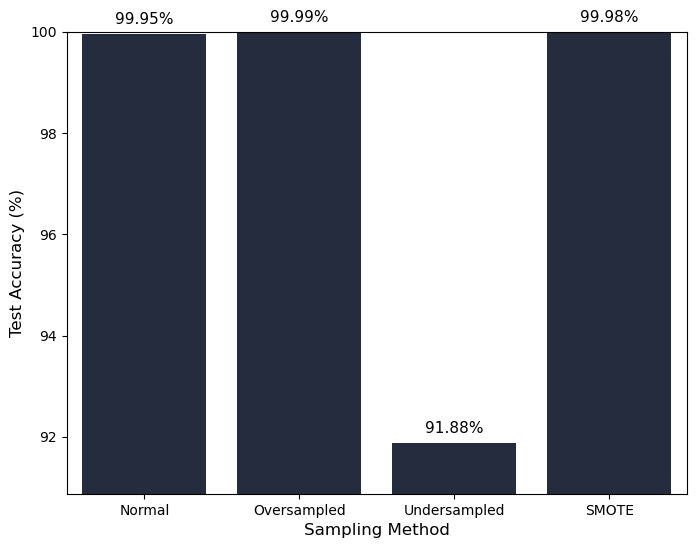

In [47]:
test_accuracies = {
    "Normal": acc_normal_test * 100,
    "Oversampled": acc_over_test * 100,
    "Undersampled": acc_under_test * 100,
    "SMOTE": acc_smote_test * 100
}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()),color='#202a41')
plt.ylabel("Test Accuracy (%)", fontsize=12)
plt.xlabel("Sampling Method", fontsize=12)

for i, acc in enumerate(test_accuracies.values()):
    plt.text(i, acc + 0.2, f"{acc:.2f}%", ha='center', fontsize=11)

plt.ylim(min(test_accuracies.values()) - 1, 100)
plt.show()

### Test Accuracy Comparison: XGBoost vs Random Forest

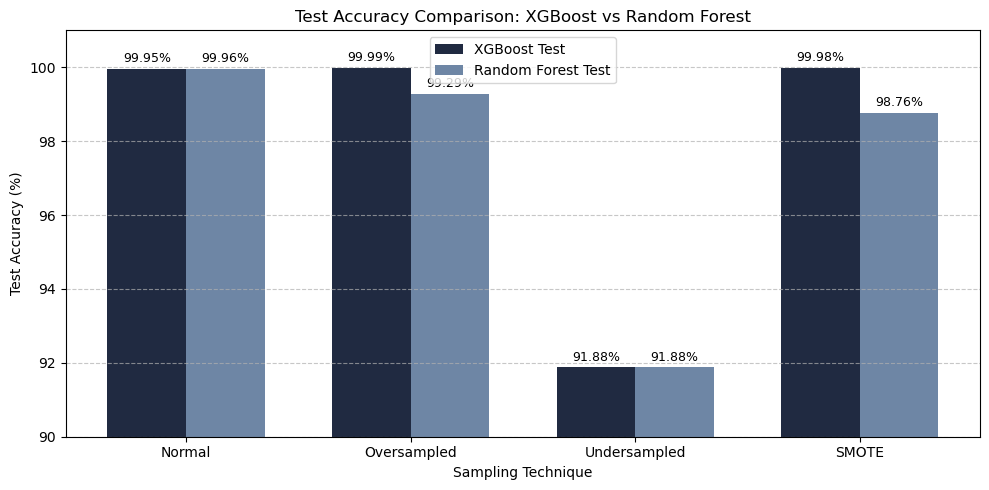

In [50]:
import matplotlib.pyplot as plt

# Replace these with your actual test accuracy values
xgb_test = [99.95, 99.99, 91.88, 99.98]    # Normal, Oversample, Undersample, SMOTE
rf_test = [99.96, 99.29, 91.88, 98.76]

labels = ['Normal', 'Oversampled', 'Undersampled', 'SMOTE']
x = range(len(labels))
bar_width = 0.35

plt.figure(figsize=(10, 5))

# Plotting only test accuracies
xgb_bars = plt.bar([i - bar_width/2 for i in x], xgb_test, width=bar_width, label='XGBoost Test', color='#202a41')
rf_bars = plt.bar([i + bar_width/2 for i in x], rf_test, width=bar_width, label='Random Forest Test', color='#6e86a5')

# Annotate bars
for bar in xgb_bars + rf_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=9)
# Axis & Labels
plt.xticks(x, labels)
plt.xlabel('Sampling Technique')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy Comparison: XGBoost vs Random Forest')
plt.ylim(90, 101)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Save the Model

In [53]:
xgb1 = XGBClassifier()
xgb1.fit(main.x_oversampled, main.y_oversampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [54]:
import joblib
joblib.dump(xgb1,'Credit_Card_Model.pkl')

['Credit_Card_Model.pkl']

### Performing Prediction on Deployed Model

In [56]:
model=joblib.load('Credit_Card_Model.pkl')
pred = model.predict([[-1.359807134, -0.072781173, 2.536346738, 1.378155224, -0.33832077,
                       0.462387778, 0.239598554, 0.098697901, 0.36378697, 0.090794172,
                       -0.551599533, -0.617800856, -0.991389847, -0.311169354, 1.468176972,
                       -0.470400525, 0.207971242, 0.02579058, 0.40399296, 0.251412098,
                       -0.018306778, 0.277837576, -0.11047391, 0.066928075, 0.128539358,
                       -0.189114844, 0.133558377, -0.021053053, 149.62]])
if pred == 0:
    print('Normal Transaction')
else:
    print('Fraud Transaction')

Normal Transaction


In [60]:
model=joblib.load('Credit_Card_Model.pkl')
pred = model.predict([[-2.3, 2.0, -1.6, 4.0, -0.5,
                        -1.4, -2.5, 1.4, -3.8, -2.8,
                          3.2, -2.9, -0.6, -4.3, 0.4,
                         -1.1, -2.8, 0.0, 0.4, 0.1,
                          0.5, -0.0, -0.5, 0.3, 0.0,
                          0.2, 0.3, -0.1, 0.0]])
if pred == 0:
    print('Normal Transaction')
else:
    print('Fraud Transaction')

Fraud Transaction
